# The Logging Module

Logging is a very useful tool in a programmer’s toolbox. 

It can help you develop a better understanding of the flow of a program and discover scenarios that you might not even have thought of while developing. 



In [1]:
import logging

With the logging module imported, you can use something called a “logger” to log messages that you want to see.

In [2]:
logging.debug('This is a debug message')
logging.info('This is an info message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


The output shows the severity level before each message along with root, which is the name the logging module gives to its default logger 

## Basic Configurations

Some of the commonly used parameters for basicConfig() are the following:

- level: The root logger will be set to the specified severity level.
- filename: This specifies the file.
- filemode: If filename is given, the file is opened in this mode. The default is a, which means append.
- format: This is the format of the log message.

In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
logging.debug('This will get logged')

DEBUG:root:This will get logged


For logging to a file rather than the console, filename and filemode can be used, and you can decide the format of the message using format. The following example shows the usage of all three:

In [1]:
import logging
logging.basicConfig(filename='app.log', filemode='w', format='%(name)s - %(levelname)s - %(message)s')
logging.warning('This will get logged to a file')

## Formatting the Output

Format can take a string with LogRecord attributes in any arrangement you like. The entire list of available attributes can be found [here](URL 'https://docs.python.org/3/library/logging.html#logrecord-attributes')

In [1]:
import logging

logging.basicConfig(format='%(process)d-%(levelname)s-%(message)s')
logging.warning('This is a Warning')

7650-WARNING-This is a Warning


In [1]:
import logging

logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)
logging.info('Admin logged in')

2022-03-11 19:47:41,698 - Admin logged in


In [2]:
import logging

logging.basicConfig(format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')
logging.warning('Admin logged out')

2022-03-11 19:49:42,992 - Admin logged out


## Logging Variable Data

In [ ]:
import logging

name = 'John'

logging.error('%s raised an error', name)
#logging.error(f'{name} raised an error')

## Capturing Stack Traces

The logging module also allows you to capture the full stack traces in an application. Exception information can be captured if the exc_info parameter is passed as True

In [ ]:
import logging

a = 5
b = 0

try:
    c = a / b
except Exception as e:
    #logging.error("Exception occurred", exc_info=True)
    logging.exception("Exception occurred")

## Classes and Functions

The most commonly used classes defined in the logging module are the following:

- **Logger**: This is the class whose objects will be used in the application code directly to call the functions.

- **LogRecord**: Loggers automatically create LogRecord objects that have all the information related to the event being logged, like the name of the logger, the function, the line number, the message, and more.

- **Handler**: Handlers send the LogRecord to the required output destination, like the console or a file. Handler is a base for subclasses like StreamHandler, FileHandler, SMTPHandler, HTTPHandler, and more. These subclasses send the logging outputs to corresponding destinations, like sys.stdout or a disk file.

- **Formatter**: This is where you specify the format of the output by specifying a string format that lists out the attributes that the output should contain.

In [ ]:
import logging

logger = logging.getLogger('example_logger')
logger.warning('This is a warning')

Unlike the root logger, a custom logger can’t be configured using basicConfig(). You have to configure it using Handlers and Formatters:

## Using Handlers

Handlers send the log messages to configured destinations like the standard output stream or a file or over HTTP or to your email via SMTP.

Like loggers, you can also set the severity level in handlers. This is useful if you want to set multiple handlers for the same logger but want different severity levels for each of them.

In [ ]:
# logging_example.py

import logging

# Create a custom logger
logger = logging.getLogger(__name__)

# Create handlers
c_handler = logging.StreamHandler()
f_handler = logging.FileHandler('file.log')
c_handler.setLevel(logging.WARNING)
f_handler.setLevel(logging.ERROR)

# Create formatters and add it to handlers
c_format = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
f_format = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
c_handler.setFormatter(c_format)
f_handler.setFormatter(f_format)

# Add handlers to the logger
logger.addHandler(c_handler)
logger.addHandler(f_handler)

logger.warning('This is a warning')
logger.error('This is an error')

The name of the logger corresponding to the __name__ variable is logged as __main__, which is the name Python assigns to the module where execution starts. 

## Loading from Yaml file


In [ ]:
import logging
import logging.config
import yaml

with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f.read())
    logging.config.dictConfig(config)

logger = logging.getLogger(__name__)

logger.debug('This is a debug message')

# Data Version Contol (DVC)

## What ?

Data Version Control, or DVC, is a data and ML experiment management tool that takes advantage of the existing engineering toolset like Git.


## Why ?

- Build automated pipelines & reproducible experiments
- Manage data and model versioning
- Organize project code and team collaboration
- Visualize metrics & collaborate on ML experiments.

## How ?

### **Step 1**: Organize repo & Build a prototype
### **Step 2**: Create a single configuration file




In [ ]:
import yaml
%cd /workspace/boneage-arc/

In [ ]:
with open("params.yaml") as conf_file:
    config = yaml.safe_load(conf_file)
print(config)

### **Step 3**: Move reusable code to .py modules


In [ ]:
from src.stages.data_load import *
from src.utils.logs import get_logger


### **Step 4**: Build ML experiment pipeline

In [ ]:
data_load(config_path = 'params.yaml')
#!python -m src.stages.data_load --config=params.yaml

### **Step 5**: Automate pipeline with DVC

Install DVC

`!pip install dvc`

Initialize DVC

`!dvc init`


Commit Changes

`
 git status
 git add .
 git commit -m "Initialize dvc"
`

Run stages

Data load
`
dvc run -n data_load \
-d src/stages/data_load.py \
-o data/processed/processed.csv \
-p  base,data_load \
python -m src.stages.data_load --config=params.yaml`

Featurize
`
dvc run -n featurize \
-d src/stages/featurize.py \
-d data/processed/processed.csv \
-o data/processed/featurized.csv \
-o data/processed/norms_params.json \
-p  base,featurize \
python -m src.stages.featurize --config=params.yaml`

### **Step 6**: Reproduce end-to-end pipeline


`dvc repro`

`dvc repro -f`

`dvc repro -s featurize`


Update .py file and run `dvc repro`

delete an output file and run `dvc repro`

change hyperparams in params.yaml aand run `dvc repro`


## Versioning Data & Models

- Reproducible ML experiments requires versionbed data, models and expiriment artifacts.
- Meet regulatory compliance and Ethical AI requirements
- Avoid manual versioning


### How ?

create a file.txt and track with `dvc add` 

create a dir and track with `dvc add -v`

```
Removing '/workspace/boneage-arc/file.txt'
Uploading '/workspace/boneage-arc/.dvc/cache/d4/1d8cd98f00b204e9800998ecf8427e' to '/workspace/boneage-arc/file.txt'
Saving information to 'file.txt.dvc'.
```

### Remote storage

`dvc remote add -d myremote /workspace/temp`

open config file

`dvc push -v`


dvc uploads dependencies and outputs in `dvc.lock` to remote storage

`dvc pull`

### Switching Versions

Produce simple metafiles once, describing what datasets, ML artifacts, etc. to track. This metadata can be put in Git in lieu of large files.

Use DVC to create snapshots of the data, restore previous versions, reproduce experiments, record evolving metrics, and more!

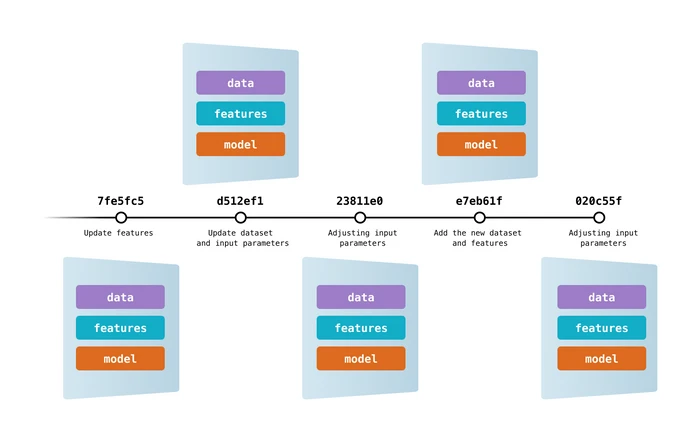





create a file.txt and track with `dvc add` 

delete and file and retrieve it from local storage with `dvc checkout`

___________

- update data

- track with dvc

- commit .dvc

- `git tag -a "v1.0" -m "file with some data"`

- push to remote

- git log --oneline

- git checkout HEAD^1 file.txt.dvc

- dvc checkout

- commit changes